# Пример 10

In [70]:
from sympy import * # библиотека: sympy

In [90]:
from sympy.printing.mathml import print_mathml # библиотека: print_mathml

In [54]:
from sympy import init_printing # библиотека: init_printing

In [73]:
from sympy import init_session # библиотека: init_session

In [74]:
from sympy.printing.dot import dotprint  # библиотека: dotprint

In [75]:
from sympy.abc import x  # библиотека: abc

In [76]:
import numpy as np # библиотека: numpy как mpl (треб.)

In [50]:
x, y, z = symbols("x y z")

## Основные операции : 

## Замена

In [5]:
expr = cos(x) + 1
expr.subs(x, y)

cos(y) + 1

In [6]:
expr.subs(x, 0)

2

In [10]:
expr = x**y
expr

x**y

In [9]:
expr = expr.subs(y, x**y)
expr

x**(x**y)

In [12]:
expr = expr.subs(y, x**x)
expr

x**(x**x)

In [19]:
expr = sin(2*x) + cos(2*x)
expand_trig(expr)

2*sin(x)*cos(x) + 2*cos(x)**2 - 1

In [16]:
expr.subs(sin(2*x), 2*sin(x)*cos(x))

2*sin(x)*cos(x) + cos(2*x)

In [21]:
expr = cos(x)
expr.subs(x, 0)

1

In [23]:
expr = cos(x)
expr

cos(x)

In [30]:
expr = x**3 + 4*x*y - z
expr.subs([(x, 2), (y, 4), (z, 0)])

40

In [33]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
expr.subs(replacements)

-4*x**3 - 2*x + y**4 + 4*y**2 + 3

## Преобразование строк в символьные выражения

In [28]:
str_expr = "x**2 + 3*x - 1/2"
expr = sympify(str_expr)
expr

x**2 + 3*x - 1/2

In [43]:
expr.subs(x, 2)

cos(4)

## Evalf

In [34]:
expr = sqrt(8)
expr.evalf()

2.82842712474619

In [35]:
pi.evalf(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

In [36]:
expr = cos(2*x)
expr.evalf(subs={x: 2.4})

0.0874989834394464

In [38]:
one = cos(1)**2 + sin(1)**2
(one - 1).evalf()

-0.e-124

In [39]:
(one - 1).evalf(chop=True)

0

## Lambdify

In [47]:
a = numpy.arange(10) 
expr = sin(x)
f = lambdify(x, expr, "numpy") 
f(a) 

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [48]:
f = lambdify(x, expr, "math")
f(0.1)

0.09983341664682815

In [49]:
def mysin(x):
    """
    My sine. Note that this is only accurate for small x.
    """
    return x
f = lambdify(x, expr, {"sin":mysin})
f(0.1)

0.1

## Печатание :

## Настройка красивой печати

In [55]:
init_printing()

In [56]:
init_session() 

IPython console for SymPy 1.11.1 (Python 3.10.6-32-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



In [58]:
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing() # doctest: +SKIP

## Функции печати

### str :

In [61]:
x, y, z = symbols('x y z')
str(Integral(sqrt(1/x), x))

'Integral(sqrt(1/x), x)'

In [62]:
print(Integral(sqrt(1/x), x))

Integral(sqrt(1/x), x)


### srepr :

In [63]:
srepr(Integral(sqrt(1/x), x))

"Integral(Pow(Pow(Symbol('x'), Integer(-1)), Rational(1, 2)), Tuple(Symbol('x')))"

### Симпатичный принтер в формате ASCII :

In [65]:
pprint(Integral(sqrt(1/x), x), use_unicode=False)

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


In [66]:
pretty(Integral(sqrt(1/x), x), use_unicode=False)

'  /          \n |           \n |     ___   \n |    / 1    \n |   /  -  dx\n | \\/   x    \n |           \n/            '

### Unicode :

In [67]:
pprint(Integral(sqrt(1/x), x), use_unicode=True)

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


In [68]:
print(latex(Integral(sqrt(1/x), x)))

\int \sqrt{\frac{1}{x}}\, dx


### MathML :

In [71]:
print_mathml(Integral(sqrt(1/x), x))

<apply>
	<int/>
	<bvar>
		<ci>x</ci>
	</bvar>
	<apply>
		<root/>
		<apply>
			<power/>
			<ci>x</ci>
			<cn>-1</cn>
		</apply>
	</apply>
</apply>



### Dot :

In [77]:
print(dotprint(x+2))

digraph{

# Graph style
"ordering"="out"
"rankdir"="TD"

#########
# Nodes #
#########

"Add(Integer(2), Symbol('x'))_()" ["color"="black", "label"="Add", "shape"="ellipse"];
"Integer(2)_(0,)" ["color"="black", "label"="2", "shape"="ellipse"];
"Symbol('x')_(1,)" ["color"="black", "label"="x", "shape"="ellipse"];

#########
# Edges #
#########

"Add(Integer(2), Symbol('x'))_()" -> "Integer(2)_(0,)";
"Add(Integer(2), Symbol('x'))_()" -> "Symbol('x')_(1,)";
}


## Упрощение :

## Пример упрощать

In [78]:
simplify(sin(x)**2 + cos(x)**2)

In [79]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [80]:
simplify(gamma(x)/gamma(x - 2))

In [81]:
simplify(x**2 + 2*x + 1)

## Упрощение полинома/рациональной функции

In [82]:
expand((x + 1)**2)

In [84]:
expand((x + 2)*(x - 3))

In [85]:
expand((x + 1)*(x - 2) - (x - 1)*x)

## Фактор

In [86]:
factor(x**3 - x**2 + x - 1)

In [87]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [88]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

In [89]:
expand((cos(x) + sin(x))**2)

## Collect

In [91]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [92]:
collected_expr = collect(expr, x)
collected_expr

In [93]:
collected_expr.coeff(x, 2)

## Cancel

In [99]:
cancel((x**2 + 2*x + 1)/(x**2 + x))

In [96]:
expr = 1/x + (3*x/2 - 2)/(x - 4)
expr

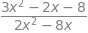

In [97]:
cancel(expr)

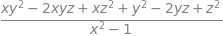

In [98]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr

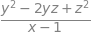

In [100]:
cancel(expr)

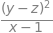

In [101]:
factor(expr)

## Apart

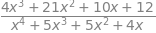

In [102]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

In [103]:
apart(expr)

## Тригонометрическое упрощение :

In [104]:
acos(x)

In [105]:
cos(acos(x))

In [106]:
asin(1)

## Trigsimp

In [107]:
trigsimp(sin(x)**2 + cos(x)**2)

In [108]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [109]:
trigsimp(sin(x)*tan(x)/sec(x))

In [110]:
trigsimp(cosh(x)**2 + sinh(x)**2)

In [111]:
trigsimp(sinh(x)/tanh(x))

## Expand_trig

In [112]:
expand_trig(sin(x + y))

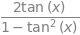

In [113]:
expand_trig(tan(2*x))

In [114]:
trigsimp(sin(x)*cos(y) + sin(y)*cos(x))

## Powers :

In [116]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

## Powsimp

In [117]:
powsimp(x**a*x**b)

In [118]:
powsimp(x**a*y**a)

In [119]:
powsimp(t**c*z**c)

In [120]:
powsimp(t**c*z**c, force=True)

In [121]:
(z*t)**2

In [122]:
sqrt(x*y)

In [123]:
powsimp(z**2*t**2)

In [124]:
powsimp(sqrt(x)*sqrt(y))

## Expand_power_exp / Expand_power_base

In [125]:
expand_power_exp(x**(a + b))

In [126]:
expand_power_base((x*y)**a)

In [127]:
expand_power_base((z*t)**c)

In [128]:
expand_power_base((z*t)**c, force=True)

In [129]:
x**2*x**3

## Powdenest

In [130]:
powdenest((x**a)**b)

In [131]:
powdenest((z**a)**b)

In [132]:
powdenest((z**a)**b, force=True)

In [133]:
ln(x)

## Expand_log

In [135]:
expand_log(log(x*y))

In [136]:
expand_log(log(x/y))

In [139]:
expand_log(log(x**2))

In [137]:
expand_log(log(x**n))

In [140]:
expand_log(log(z*t))

In [141]:
expand_log(log(z**2))

In [142]:
expand_log(log(z**2), force=True)

## Logcombine

In [143]:
logcombine(log(x) + log(y))

In [144]:
logcombine(n*log(x))

In [145]:
logcombine(n*log(z))

In [146]:
logcombine(n*log(z), force=True)

## Специальные функции :

In [147]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')

In [148]:
factorial(n)

In [149]:
binomial(n, k)

In [150]:
gamma(z)

In [154]:
hyper([1, 2], [3], z)

 ┌─  ⎛1, 2 │  ⎞
 ├─  ⎜     │ z⎟
2╵ 1 ⎝ 3   │  ⎠

## Rewrite

In [152]:
tan(x).rewrite(cos)

In [153]:
factorial(x).rewrite(gamma)

## Expand_func

In [155]:
expand_func(gamma(x + 3))

## Hyperexpand

In [156]:
hyperexpand(hyper([1, 1], [2], z))

In [157]:
expr = meijerg([[1],[1]], [[1],[]], -z)
expr

╭─╮1, 1 ⎛1  1 │   ⎞
│╶┐     ⎜     │ -z⎟
╰─╯2, 1 ⎝1    │   ⎠

## Combsimp

In [158]:
n, k = symbols('n k', integer = True)
combsimp(factorial(n)/factorial(n - 3))

In [159]:
combsimp(binomial(n+1, k+1)/binomial(n, k))

## Gammasimp

In [160]:
gammasimp(gamma(x)*gamma(1 - x))

## Непрерывные дроби :

In [161]:
def list_to_frac(l):
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1/expr
    return l[0] + expr
list_to_frac([x, y, z])

In [162]:
list_to_frac([1, 2, 3, 4])

In [163]:
syms = symbols('a0:5')
syms

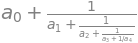

In [164]:
a0, a1, a2, a3, a4 = syms
frac = list_to_frac(syms)
frac

In [165]:
frac = cancel(frac)
frac

In [166]:
l = []
frac = apart(frac, a0)
frac

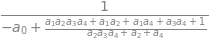

In [168]:
l.append(a0)
frac = 1/(frac - a0)
frac

## Исчисление :

In [169]:
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

## Производные

In [170]:
diff(cos(x), x)

In [171]:
diff(exp(x**2), x)

In [172]:
diff(x**4, x, x, x)

In [173]:
diff(x**4, x, 3)

In [174]:
expr = exp(x*y*z)
diff(expr, x, y, y, z, z, z, z)

In [175]:
diff(expr, x, y, 2, z, 4)

In [176]:
diff(expr, x, y, y, z, 4)

In [177]:
expr.diff(x, y, y, z, 4)

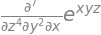

In [178]:
deriv = Derivative(expr, x, y, y, z, 4)
deriv

In [179]:
deriv.doit()

In [180]:
m, n, a, b = symbols('m n a b')
expr = (a*x + b)**m
expr.diff((x, n))

## Интегралы

In [181]:
integrate(cos(x), x)

In [182]:
integrate(exp(-x), (x, 0, oo))

In [183]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [184]:
expr = integrate(x**x, x)
print(expr)

Integral(x**x, x)


In [185]:
expr

In [186]:
expr = Integral(log(x)**2, x)
expr

In [187]:
expr.doit()

In [188]:
integ = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x - exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)

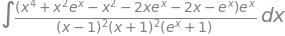

In [189]:
integ

In [190]:
integ.doit()

In [191]:
integ = Integral(sin(x**2), x)
integ

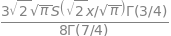

In [192]:
integ.doit()

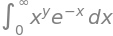

In [193]:
integ = Integral(x**y*exp(-x), (x, 0, oo))
integ

In [194]:
integ.doit()

⎧ Γ(y + 1)    for re(y) > -1
⎪                           
⎪∞                          
⎪⌠                          
⎨⎮  y  -x                   
⎪⎮ x ⋅ℯ   dx    otherwise   
⎪⌡                          
⎪0                          
⎩                           

## Лимит

In [196]:
limit(sin(x)/x, x, 0)

In [197]:
expr = x**2/exp(x)
expr.subs(x, oo)

nan

In [198]:
limit(expr, x, oo)

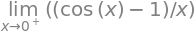

In [199]:
expr = Limit((cos(x) - 1)/x, x, 0)
expr

In [200]:
expr.doit()

In [201]:
limit(1/x, x, 0, '+')

In [202]:
limit(1/x, x, 0, '-')

## Расширение Series

In [203]:
expr = exp(sin(x))
expr.series(x, 0, 4)

In [204]:
x + x**3 + x**6 + O(x**4)

In [205]:
x*O(1)

In [206]:
expr.series(x, 0, 4).removeO()

In [207]:
exp(x - 6).series(x, x0=6)

## Конечные разности

In [208]:
f, g = symbols('f g', cls=Function)
differentiate_finite(f(x)*g(x))

In [209]:
f = Function('f')
dfdx = f(x).diff(x)
dfdx.as_finite_difference()

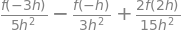

In [210]:
f = Function('f')
d2fdx2 = f(x).diff(x, 2)
h = Symbol('h')
d2fdx2.as_finite_difference([-3*h,-h,2*h])

In [212]:
finite_diff_weights(2, [-3, -1, 2], 0)[-1][-1]

In [213]:
x_list = [-3, 1, 2]
y_list = symbols('a b c')
apply_finite_diff(1, x_list, y_list, 0)

## Решатель :

In [220]:
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

## Примечание об уравнениях

In [215]:
Eq(x, y)

In [216]:
solveset(Eq(x**2, 1), x)

In [218]:
solveset(Eq(x**2 - 1, 0), x)

In [219]:
solveset(x**2 - 1, x)

## Решение уравнений алгебраически

In [221]:
solveset(x**2 - x, x)

In [222]:
solveset(x - x, x, domain=S.Reals)

In [223]:
solveset(sin(x) - 1, x, domain=S.Reals)

⎧        π │      ⎫
⎨2⋅n⋅π + ─ │ n ∊ ℤ⎬
⎩        2 │      ⎭

In [224]:
solveset(exp(x), x) 

In [225]:
solveset(cos(x) - x, x)

{x │ x ∊ ℂ ∧ (-x + cos(x) = 0)}

In [226]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

In [227]:
linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))

In [228]:
M = Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
system = A, b = M[:, :-1], M[:, -1]
linsolve(system, x, y, z)

In [229]:
a, b, c, d = symbols('a, b, c, d', real=True)
nonlinsolve([a**2 + a, a - b], [a, b])

In [230]:
nonlinsolve([x*y - 1, x - 2], x, y)

In [231]:
nonlinsolve([x**2 + 1, y**2 + 1], [x, y])

In [232]:
system = [x**2 - 2*y**2 -2, x*y - 2]
vars = [x, y]
nonlinsolve(system, vars)

In [233]:
nonlinsolve([x*y, x*y - x], [x, y])

In [234]:
system = [a**2 + a*c, a - b]
nonlinsolve(system, [a, b])

In [235]:
solveset(x**3 - 6*x**2 + 9*x, x)

In [236]:
roots(x**3 - 6*x**2 + 9*x, x)

## Решение дифференциальных уравнений

In [237]:
f, g = symbols('f g', cls=Function)

In [238]:
f(x)

In [240]:
f(x).diff(x)

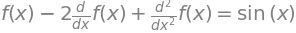

In [241]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

In [243]:
dsolve(diffeq, f(x))

In [244]:
dsolve(f(x).diff(x)*(1 - sin(f(x))) - 1, f(x))

## Матрицы :

In [ ]:
x =   60 
y=   20